<a href="https://colab.research.google.com/github/massirism/PDI-UNS/blob/main/TP2_Massiris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

Imageio: 'coffee.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/coffee.png (441 kB)
Downloading: 8192/451102 bytes (1.8%)451102/451102 bytes (100.0%)
  Done
File saved as /root/.imageio/images/coffee.png.


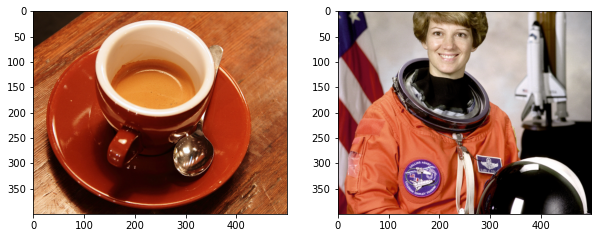

In [ ]:
img_1 = imageio.imread('imageio:coffee.png')[:, 50:550, :]/255
img_2 = imageio.imread('imageio:astronaut.png')[56:456, 6:506, :]/255

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)

1. Aritmética de pixels
Implementar las siguientes operaciones aritméticas:

*  Suma y diferencia clampeada en RGB (la suma ya está hecha en el primer ejemplo)
*  Suma y diferencia promediada en RGB
*  Suma y diferencia en YIQ
*  If-lighter / If-darker

#Suma y diferencia clampeada en RGB

Text(0.5, 1.0, 'Imagen resultante')

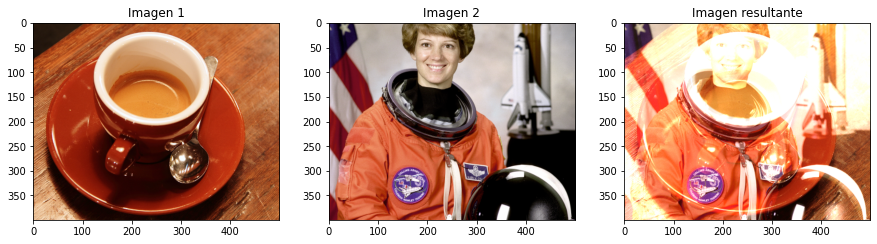

In [ ]:
# Implementación de suma clampleada
img_3 = np.clip(img_1 + img_2, 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)

axes[0].set_title('Imagen 1')
axes[1].set_title('Imagen 2')
axes[2].set_title('Imagen resultante')


Text(0.5, 1.0, 'Imagen resultante')

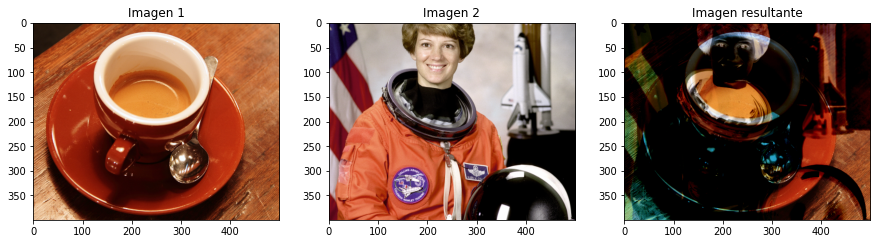

In [ ]:
# Implementación de la diferencia clampleada
img_3 = np.clip(img_1 - img_2, 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[0].set_title('Imagen 1')
axes[1].imshow(img_2)
axes[1].set_title('Imagen 2')
axes[2].imshow(img_3)
axes[2].set_title('Imagen resultante')

#Suma y diferencia promediada en RGB

Text(0.5, 1.0, 'Imagen resultante')

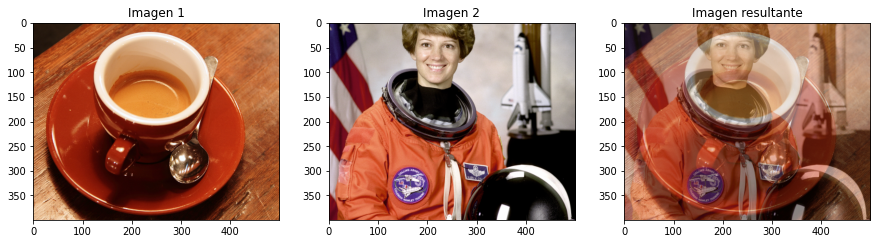

In [ ]:
# Implementación de suma promediada
N=len([img_1,img_2])# En este caso N=2
img_3 = np.clip((img_1 + img_2)/N, 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)

axes[0].set_title('Imagen 1')
axes[1].set_title('Imagen 2')
axes[2].set_title('Imagen resultante')

Text(0.5, 1.0, 'Imagen resultante')

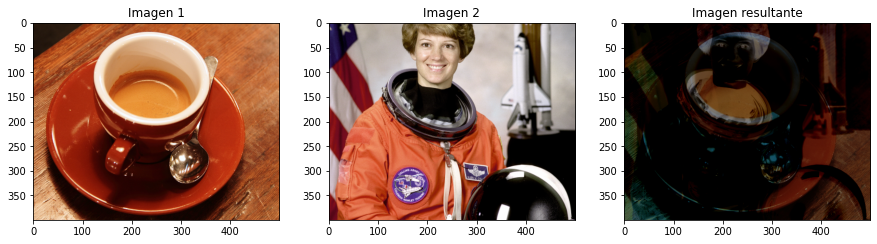

In [ ]:
# Implementación de diferencia promediada
N=len([img_1,img_2])# En este caso N=2
img_3 = np.clip((img_1 - img_2)/N, 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)

axes[0].set_title('Imagen 1')
axes[1].set_title('Imagen 2')
axes[2].set_title('Imagen resultante')

#Suma y diferencia en YIQ

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imagen resultante YIQ')

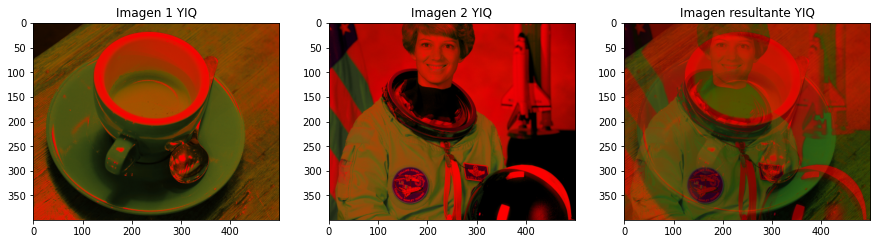

In [ ]:
# Implementación de suma en YIQ
img_1_YIQ=rgb2yiq(img_1)
img_2_YIQ=rgb2yiq(img_2)

# Y=0,  I=1,  Q=2
Y1 = img_1_YIQ[:,:,0].copy()  #luminancia img 1
I1 = img_1_YIQ[:,:,1].copy()
Q1 = img_1_YIQ[:,:,2].copy()

Y2 = img_2_YIQ[:,:,0].copy()  #luminancia img 2
I2 = img_2_YIQ[:,:,1].copy()
Q2 = img_2_YIQ[:,:,2].copy()

Y3 = (Y1+Y2)/2
I3 = (Y1*I1+Y2*I2)/(Y1+Y2)
Q3 = (Y1*Q1+Y2*Q2)/(Y1+Y2)

img_3_YIQ = np.zeros(img_1_YIQ.shape) #Obtengo las dimensiones correctas de la img 1
img_3_YIQ[:,:,0]=Y3
img_3_YIQ[:,:,1]=I3
img_3_YIQ[:,:,2]=Q3

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1_YIQ)
axes[1].imshow(img_2_YIQ)
axes[2].imshow(img_3_YIQ)

axes[0].set_title('Imagen 1 YIQ')
axes[1].set_title('Imagen 2 YIQ')
axes[2].set_title('Imagen resultante YIQ')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imagen resultante YIQ')

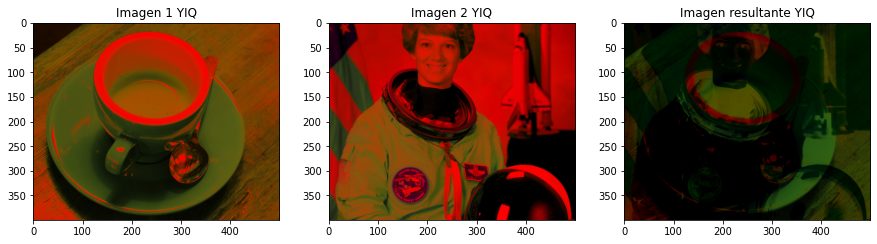

In [ ]:
# Implementación de diferencia en YIQ
img_1_YIQ=rgb2yiq(img_1)
img_2_YIQ=rgb2yiq(img_2)

# Y=0,  I=1,  Q=2
Y1 = img_1_YIQ[:,:,0].copy()  #luminancia img 1
I1 = img_1_YIQ[:,:,1].copy()
Q1 = img_1_YIQ[:,:,2].copy()

Y2 = img_2_YIQ[:,:,0].copy()  #luminancia img 2
I2 = img_2_YIQ[:,:,1].copy()
Q2 = img_2_YIQ[:,:,2].copy()

Y3 = (Y1-Y2)/2
I3 = (Y1*I1-Y2*I2)/(Y1+Y2)
Q3 = (Y1*Q1-Y2*Q2)/(Y1+Y2)

img_3_YIQ = np.zeros(img_1_YIQ.shape) #Obtengo las dimensiones correctas
img_3_YIQ[:,:,0]=Y3
img_3_YIQ[:,:,1]=I3
img_3_YIQ[:,:,2]=Q3

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1_YIQ)
axes[1].imshow(img_2_YIQ)
axes[2].imshow(img_3_YIQ)

axes[0].set_title('Imagen 1 YIQ')
axes[1].set_title('Imagen 2 YIQ')
axes[2].set_title('Imagen resultante YIQ')

#if-lighter e if-darker

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imagen resultante YIQ')

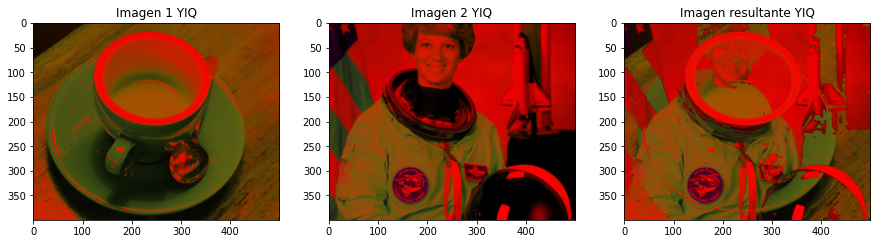

In [ ]:
# Implementación de if-lighter
img_1_YIQ=rgb2yiq(img_1)
img_2_YIQ=rgb2yiq(img_2)

# Y=0,  I=1,  Q=2
Y1 = img_1_YIQ[:,:,0].copy()  #luminancia img 1
I1 = img_1_YIQ[:,:,1].copy()
Q1 = img_1_YIQ[:,:,2].copy()

Y2 = img_2_YIQ[:,:,0].copy()  #luminancia img 2
I2 = img_2_YIQ[:,:,1].copy()
Q2 = img_2_YIQ[:,:,2].copy()

#Matriz luminancia de im1>im2
m_aux1=Y1>Y2
#Matriz luminancia de im2>im1
m_aux2=Y2>Y1

#print(m_aux1)
#print(m_aux2)
#Así me aseguro de agarrar los pixeles que son "TRUE" o más luminosos.
img_3_YIQ[m_aux1] = img_1_YIQ[m_aux1]
img_3_YIQ[m_aux2] = img_2_YIQ[m_aux2]

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1_YIQ)
axes[1].imshow(img_2_YIQ)
axes[2].imshow(img_3_YIQ)

axes[0].set_title('Imagen 1 YIQ')
axes[1].set_title('Imagen 2 YIQ')
axes[2].set_title('Imagen resultante YIQ')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imagen resultante YIQ')

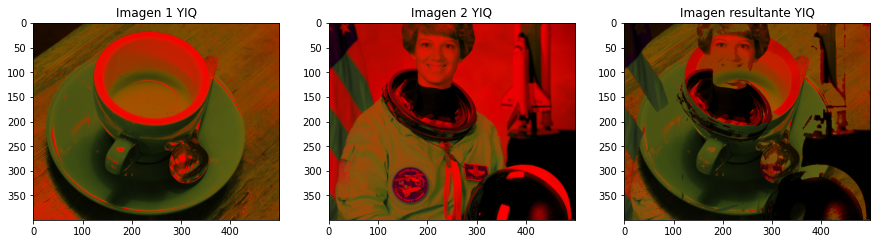

In [ ]:
# Implementación de if-darker
img_1_YIQ=rgb2yiq(img_1)
img_2_YIQ=rgb2yiq(img_2)

# Y=0,  I=1,  Q=2
Y1 = img_1_YIQ[:,:,0].copy()  #luminancia img 1
I1 = img_1_YIQ[:,:,1].copy()
Q1 = img_1_YIQ[:,:,2].copy()

Y2 = img_2_YIQ[:,:,0].copy()  #luminancia img 2
I2 = img_2_YIQ[:,:,1].copy()
Q2 = img_2_YIQ[:,:,2].copy()

#Matriz luminancia de im1>im2
m_aux1=Y1<Y2
#Matriz luminancia de im2>im1
m_aux2=Y2<Y1

#print(m_aux1)
#print(m_aux2)
#Así me aseguro de agarrar los pixeles que son "TRUE" o más luminosos.
img_3_YIQ[m_aux1] = img_1_YIQ[m_aux1]
img_3_YIQ[m_aux2] = img_2_YIQ[m_aux2]

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1_YIQ)
axes[1].imshow(img_2_YIQ)
axes[2].imshow(img_3_YIQ)

axes[0].set_title('Imagen 1 YIQ')
axes[1].set_title('Imagen 2 YIQ')
axes[2].set_title('Imagen resultante YIQ')

In [ ]:
# Ayudita para implementar if-lighther e if-darker:
# A continuación creo dos arreglos x e y del mismo tamaño, donde x tiene los valores que se muestran e y son todos ceros
# Luego, al arreglo "y" le asigno 1 en los lugares donde x es estrictamente mayor a 2

x = np.array([[1,2,1,2],
              [1,2,3,2],
              [2,3,3,1],
              [1,2,3,2]])

y = np.zeros((4,4))

print(y)  # Muestro el valor de y antes de ser modificado

y[x > 2] = 1

print('')
print(y)  # Muestro el valor de y luego de ser modificado